In [1]:
# Step 1: Import Libraries
import pandas as pd


In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns


In [5]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
# Step 2: Load Dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [8]:
# Step 3: Inspect Dataset
print("Shape of data:", data.shape)
print("\nData Info:\n")
print(data.info())
print("\nFirst 5 Rows:\n")
print(data.head())
print("\nStatistical Summary:\n")
print(data.describe())

Shape of data: (7043, 21)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pap

In [9]:
# Step 4: Data Cleaning
# Check for missing values
print("\nMissing values:\n")
print(data.isnull().sum())


Missing values:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
# Handle missing values
# TotalCharges has some missing values — let's fill them with median
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [11]:
# Drop customerID column (not useful for prediction)
data.drop('customerID', axis=1, inplace=True)

In [12]:
# Encode categorical variables
cat_cols = data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [13]:
# Step 5: Exploratory Data Analysis (EDA)
# Check class distribution
print("\nChurn Distribution:\n")
print(data['Churn'].value_counts())


Churn Distribution:

Churn
0    5174
1    1869
Name: count, dtype: int64


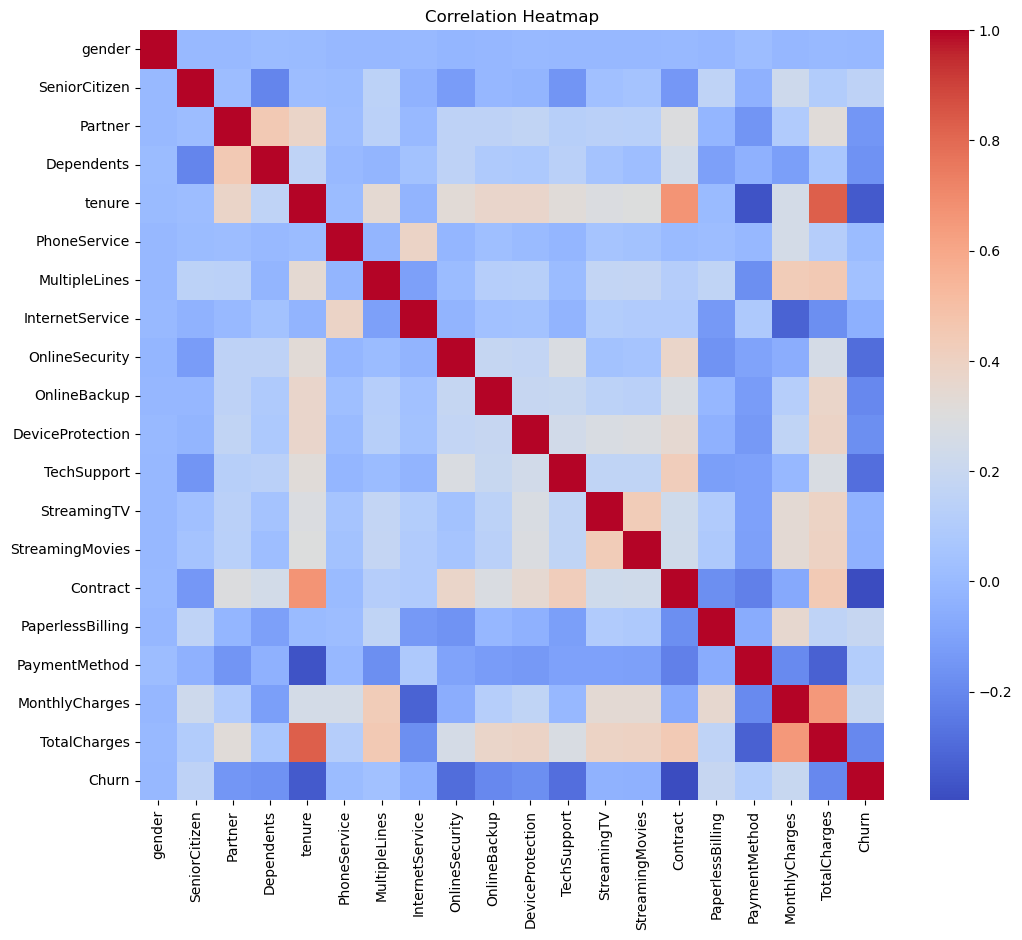

In [14]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

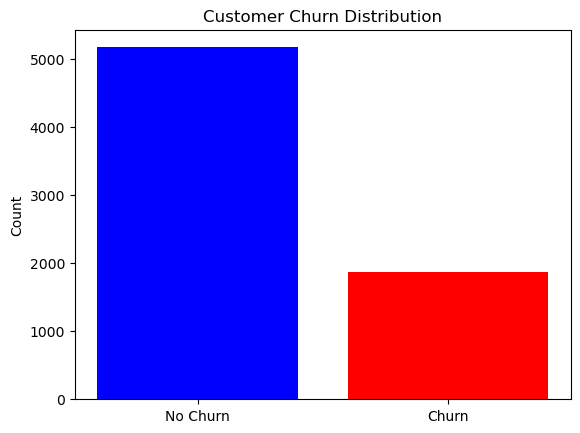

In [15]:
# Step 6: Visualizations

# 1. Matplotlib - Bar chart
churn_counts = data['Churn'].value_counts()
plt.bar(['No Churn', 'Churn'], churn_counts, color=['blue', 'red'])
plt.title('Customer Churn Distribution')
plt.ylabel('Count')
plt.show()

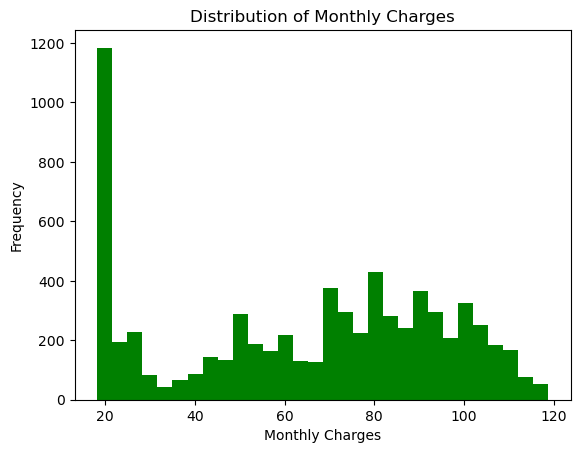

In [16]:
# 2. Matplotlib - Histogram
plt.hist(data['MonthlyCharges'], bins=30, color='green')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

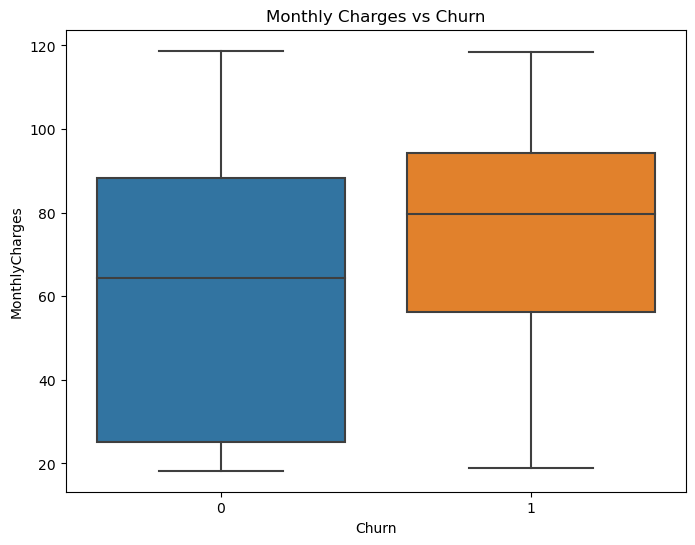

In [17]:
# 3. Seaborn - Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs Churn')
plt.show()

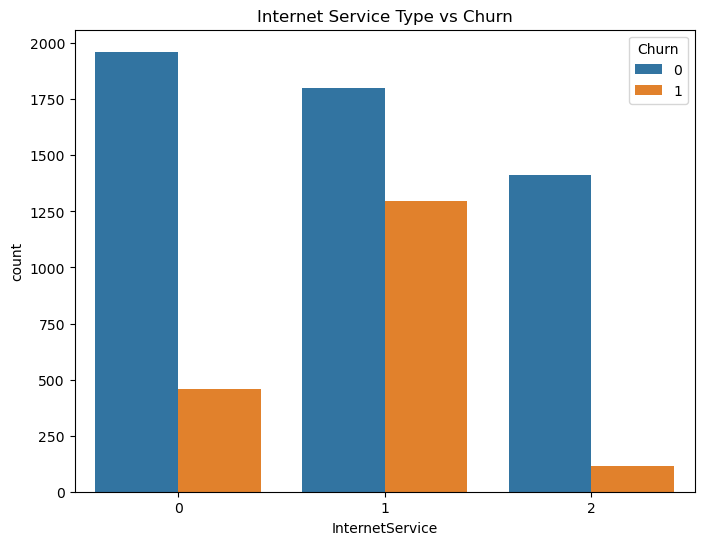

In [18]:
# 4. Seaborn - Countplot
plt.figure(figsize=(8,6))
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Internet Service Type vs Churn')
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


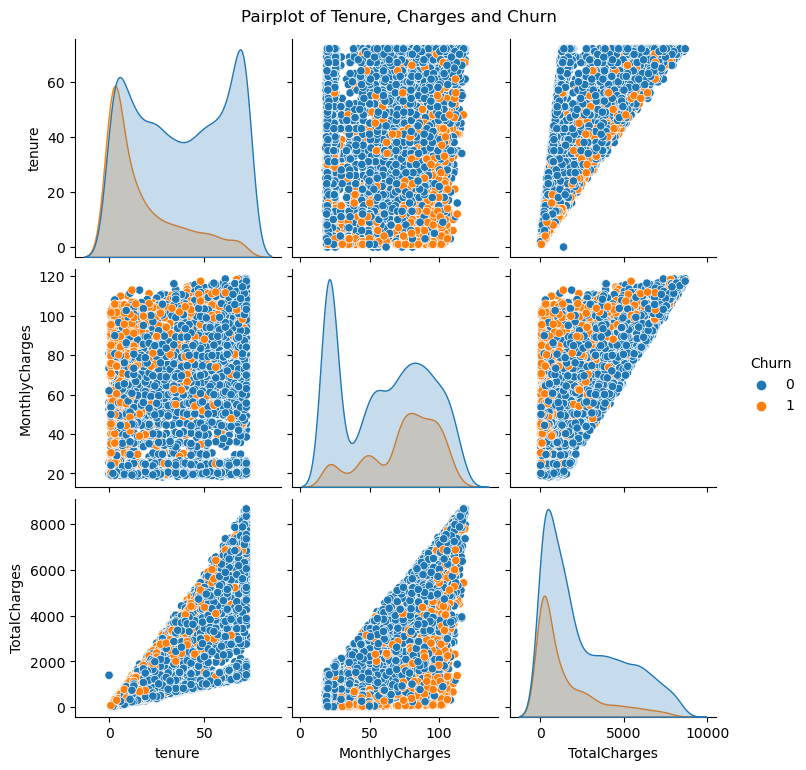

In [19]:
# 5. Custom Chart (Seaborn Pairplot)
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.suptitle('Pairplot of Tenure, Charges and Churn', y=1.02)
plt.show()

In [20]:
# Step 7: Machine Learning Model

# Features and target
X = data.drop('Churn', axis=1)
y = data['Churn']


In [21]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
# Build and Train Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [24]:
# Predict
y_pred = model.predict(X_test)


In [25]:
# Evaluate
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.8106956933270232

Confusion Matrix:
 [[1386  153]
 [ 247  327]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113

